In [0]:
!pip install --upgrade --no-cache-dir dopamine-rl
!pip install cmake
!pip install atari_py

In [0]:
import numpy as np
import os
from dopamine.agents.dqn import dqn_agent
from dopamine.atari import run_experiment
from dopamine.colab import utils as colab_utils
from absl import flags

BASE_PATH = '/tmp/colab_dope_run' # @param
GAME = 'Asterix' # @param

In [0]:
LOG_PATH = os.path.join(BASE_PATH, 'basic_agent', GAME)

class  BasicAgent(object):
  
  def __init__(self, sess, num_actions, switch_prob=0.1):
    self._sess = sess
    self._num_actions = num_actions
    self._switch_prob = switch_prob
    self.eval_mode=False
    self._last_action = np.random.randint(num_actions)
    
  def _choose_action(self):
    if np.random.random() <= self._switch_prob:
      self._last_action = np.random.randint(self._num_actions)
    return self._last_action
  
  def bundle_and_checkpoint(self, unused_checkpoint_dir, unused_iteration):
    pass
  
  def unbundle(self, unused_checkpoint_dir, unused_checkpoint_version,
               unused_data):
    pass
  
  def begin_episode(self, unused_observation):
    return self._choose_action()
  
  def end_episode(self, unused_reward):
    pass
  
  def step(self, reward, observation):
    return self._choose_action()
  
def create_basic_agent(sess, environment):
  return BasicAgent(sess, num_actions=environment.action_space.n, switch_prob=0.2)

basic_runner = run_experiment.Runner(LOG_PATH,
                                      create_basic_agent,
                                      game_name=GAME,
                                      num_iterations=200,
                                      training_steps=10,
                                      evaluation_steps=10,
                                      max_steps_per_episode=100)

In [14]:
print('Started training')
basic_runner.run_experiment()
print('Done training!')

Started training
INFO:tensorflow:Beginning training...
INFO:tensorflow:Starting iteration 0
INFO:tensorflow:Average undiscounted return per training episode: 500.00
INFO:tensorflow:Average training steps per second: 595.04
INFO:tensorflow:Average undiscounted return per evaluation episode: 200.00
INFO:tensorflow:Starting iteration 1
INFO:tensorflow:Average undiscounted return per training episode: 200.00
INFO:tensorflow:Average training steps per second: 610.24
INFO:tensorflow:Average undiscounted return per evaluation episode: 0.00
INFO:tensorflow:Starting iteration 2
INFO:tensorflow:Average undiscounted return per training episode: 0.00
INFO:tensorflow:Average training steps per second: 628.69
INFO:tensorflow:Average undiscounted return per evaluation episode: 0.00
INFO:tensorflow:Starting iteration 3
INFO:tensorflow:Average undiscounted return per training episode: 100.00
INFO:tensorflow:Average training steps per second: 610.51
INFO:tensorflow:Average undiscounted return per evalua

In [0]:
!gsutil -q -m cp -R gs://download-dopamine-rl/preprocessed-benchmarks/* /content/
experimental_data = colab_utils.load_baselines('/content')

In [16]:
basic_data = colab_utils.read_experiment(log_path=LOG_PATH, verbose=True)
basic_data['agent'] = 'BasicAgent'
basic_data['run_number'] = 1
experimental_data[GAME] = experimental_data[GAME].merge(basic_data, how='outer')

Reading statistics from: /tmp/colab_dope_run/basic_agent/Atlantis//logs/log_199


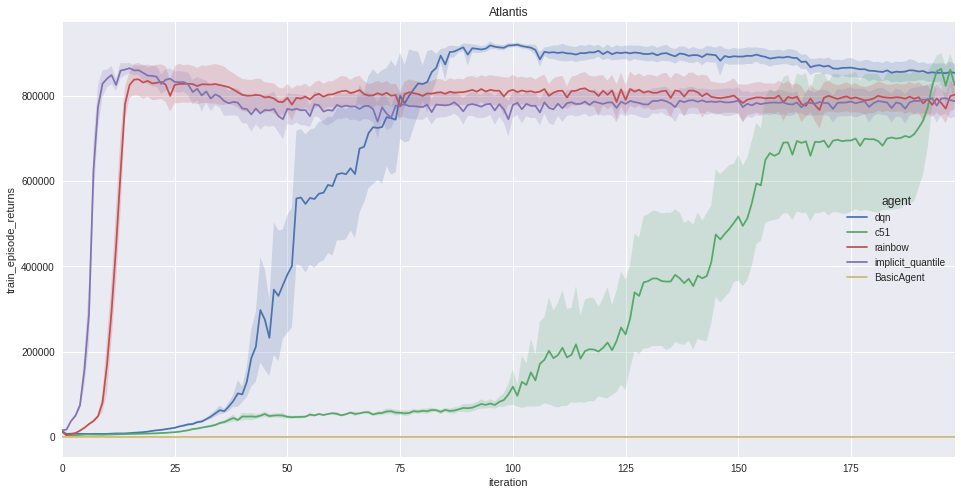

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(16,8))
sns.tsplot(data=experimental_data[GAME], time='iteration', unit='run_number', condition='agent', value='train_episode_returns', ax=ax)
plt.title(GAME)
plt.show()